In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datasets import get_dataset

In [7]:
event_data_train = pd.read_csv('Data/event_data_train/event_data_train.csv')
event_data_train.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [17]:
event_data_train['date'] = pd.to_datetime(event_data_train.timestamp, unit='s')
event_data_train['day'] = event_data_train.date.dt.date
event_data_train.head()
event_data_train.drop('Date', axis=1, inplace=True)

In [29]:
event_data_train.head()


,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [32]:
gap_event_data = event_data_train[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).\
    groupby('user_id')['timestamp'].apply(list).\
    apply(np.diff).values
gap_data = pd.Series(np.concatenate(gap_event_data, axis=0)) / (24 * 3600)
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

In [40]:
event_data_train.groupby('user_id')['day'].nunique().sort_values(ascending=False)

user_id
1046     478
13268    385
4374     327
10794    281
3572     236
        ... 
11846      1
11847      1
11851      1
11853      1
26798      1
Name: day, Length: 19234, dtype: int64

In [41]:
submissions_data = pd.read_csv('Data/submissions_data_train/submissions_data_train.csv')
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data.groupby('user_id')['day'].nunique().sort_values(ascending=False)

user_id
1046     87
3572     51
6662     51
11651    51
17825    50
         ..
12688     1
12674     1
12673     1
12672     1
26798     1
Name: day, Length: 9940, dtype: int64

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [3]:
df = pd.read_csv('Data/songs.csv')
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [2]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
data[data.submission_status == "wrong"].groupby(['user_id', 'step_id'], as_index=False).agg({'timestamp':'max'}).step_id.value_counts().keys()[0]

31978

In [13]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)


In [14]:
df = pd.read_csv('Data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
y_test = df.target
X_test = df.drop('target', axis=1)
y_test.head()
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5).fit(X_test, y_test)


<AxesSubplot:>

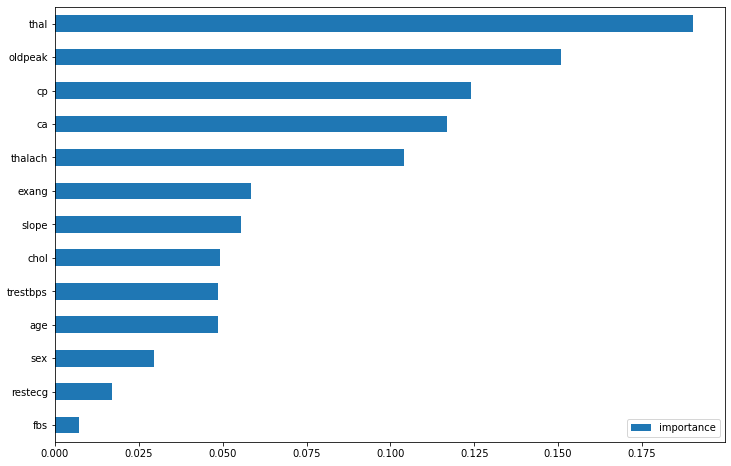

In [17]:
imp = pd.DataFrame(rf.feature_importances_, index=X_test.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))